In [1]:
from tomoSegmentPipeline import dataloader as dl
from tomoSegmentPipeline.utils import setup
from tomoSegmentPipeline.dataloader import to_categorical, transpose_to_channels_first, tomoSegment_dummyDataset, tomoSegment_dataset
from tomoSegmentPipeline.training import Train

import os
import torch
import matplotlib.pyplot as plt

PARENT_PATH = setup.PARENT_PATH

train_tomos = ['tomo02', 'tomo03', 'tomo17']
concat_train_ids = sorted([s.replace('tomo', '') for s in train_tomos])
concat_train_ids = '-'.join(concat_train_ids)

val_tomos = ['tomo32', 'tomo10']
concat_val_ids = sorted([s.replace('tomo', '') for s in val_tomos])
concat_val_ids = '-'.join(concat_val_ids)

test_tomos = ['tomo38', 'tomo04']
concat_test_ids = sorted([s.replace('tomo', '') for s in test_tomos])
concat_test_ids = '-'.join(concat_test_ids)

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

# Overfit one patch

Use the dummyDataset, which yields only one patch from `tomo02` with dimensions `dim_in^3`

In [6]:
Ncl = 2
dim_in = 52
lr = 1e-4
weight_decay = 0
Lrnd = 0
tensorboard_logdir = os.path.join(PARENT_PATH, 'model_sanityChecks/logs/overfit_to_patch/')
model_name='3.07_testRun'
augment_data = False
batch_size = 1
epochs = 500
pretrained_model = None

In [9]:
my_dataset = dl.tomoSegment_dummyDataset(dim_in=dim_in, Ncl=2)
len(my_dataset)

1

In [16]:
my_dataset.path_target

['/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/labelsTr/tomo02_patch000.nii.gz']

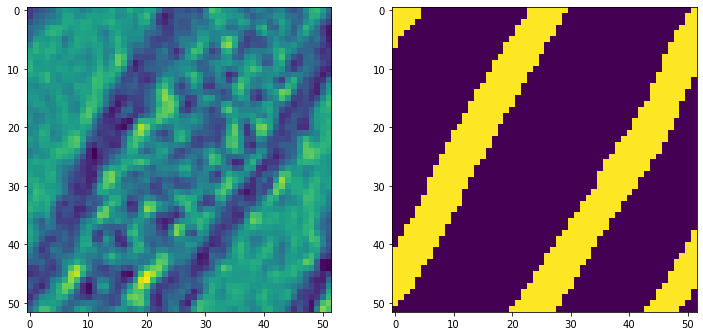

In [12]:
batch_data, batch_target = my_dataset[0]

aux_target = batch_target.argmax(0)
aux_data = batch_data.squeeze()


fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 10))
ax1.imshow(aux_data[dim_in//2])
ax2.imshow(aux_target[dim_in//2])

## Single GPU

In [18]:
trainer_overfit1 = Train(Ncl, dim_in, lr, weight_decay, Lrnd, tensorboard_logdir, model_name, augment_data,
                         batch_size, epochs, pretrained_model)

trainer_overfit1.launch(train_tomos, val_tomos, input_type='cryoCARE', num_gpus=1, accelerator=None,
                        num_workers=1, dataset=dl.tomoSegment_dummyDataset)

Running training to overfit one patch...


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Set SLURM handle signals.

  | Name    | Type         | Params
-----------------------------------------
0 | loss_fn | Tversky_loss | 0     
1 | layer1  | Sequential   | 28.6 K
2 | layer2  | Sequential   | 103 K 
3 | layer3  | Sequential   | 558 K 
4 | layer4  | Sequential   | 288 K 
5 | layer5  | Sequential   | 96.9 K
-----------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.304     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]                                          "Ncl":           2
"loss_fn":       Tversky_loss()
"lr":            0.0001
"pretrain_type": None
"weight_decay":  0
Epoch 0:  50%|█████     | 1/2 [00:00<00:00,  3.43it/s, loss=1.08, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 1:  50%|█████     | 1/2 [00:00<00:00,  3.88it/s, loss=1.08, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 2:  50%|█████     | 1/2 [00:01<00:01,  1.03s/it, loss=1.08, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 3:  50%|█████     | 1/2 [00:00<00:00,  4.14it/s, loss=1.08, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 4:  50%|█████     | 1/2 [00:00<00:00,  4.65it/s, loss=1.08, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 5:  50%|█████     | 1/2 [00:00<00:00,  3.89it/s, loss=1.08, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 6:  50%|█████     | 1/2 [00:00<00:00,  4.60it/s, loss=1.08, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 7:  50%|█████     | 1/2 [00:00<00:00,  4.17it/s, loss=1.08, v_num=

## Multiple GPUs

In [19]:
tensorboard_logdir = os.path.join(PARENT_PATH, 'model_sanityChecks/logs/overfit_to_patch_multiGPU/')

trainer_overfit1 = Train(Ncl, dim_in, lr, weight_decay, Lrnd, tensorboard_logdir, model_name, augment_data,
                         batch_size, epochs, pretrained_model)

trainer_overfit1.launch(train_tomos, val_tomos, input_type='cryoCARE', num_gpus=3, accelerator='dp',
                        num_workers=1, dataset=dl.tomoSegment_dummyDataset)

Running training to overfit one patch...


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Set SLURM handle signals.

  | Name    | Type         | Params
-----------------------------------------
0 | loss_fn | Tversky_loss | 0     
1 | layer1  | Sequential   | 28.6 K
2 | layer2  | Sequential   | 103 K 
3 | layer3  | Sequential   | 558 K 
4 | layer4  | Sequential   | 288 K 
5 | layer5  | Sequential   | 96.9 K
-----------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.304     Total estimated model params size (MB)


"Ncl":           2
"loss_fn":       Tversky_loss()
"lr":            0.0001
"pretrain_type": None
"weight_decay":  0
Saving model at:  /home/haicu/jeronimo.carvajal/Thesis/model_sanityChecks/logs/overfit_to_patch_multiGPU/version_0/3.07_testRun_ep500_in52_lr0.000100_0.model

Writing to modelSummary...
Opening ModelSummary file...
ModelSummary file exists, appending current model data...


# Train using only one patch

In [2]:
Ncl = 2
dim_in = 52
lr = 1e-4
weight_decay = 0
Lrnd = 0
tensorboard_logdir = os.path.join(PARENT_PATH, 'model_sanityChecks/logs/one_patch_training/')
model_name='3.07_onePatch'
augment_data = False
batch_size = 32
epochs = 500
pretrained_model = None

In [3]:
path_data=['/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo02_patch000_0000.nii.gz']
path_target=['/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/labelsTr/tomo02_patch000.nii.gz']

my_dataset = dl.tomoSegment_dataset(path_data, path_target, dim_in=dim_in, Ncl=2, Lrnd=0, augment_data=False)
len(my_dataset)

125

In [4]:
# one epoch should take 4 steps
len(my_dataset)/batch_size

3.90625

In [5]:
my_dataset.path_target

['/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/labelsTr/tomo02_patch000.nii.gz']

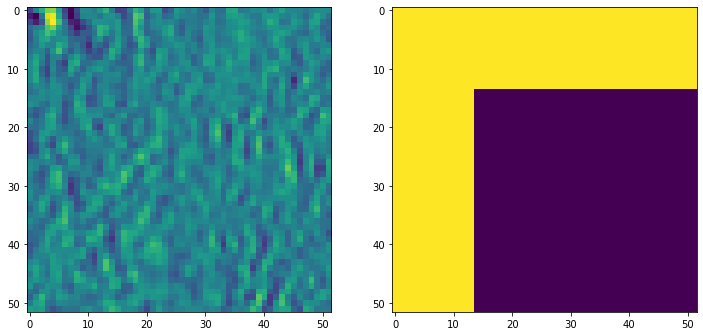

In [6]:
batch_data, batch_target = my_dataset[0]

aux_target = batch_target.argmax(0)
aux_data = batch_data.squeeze()


fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12, 10))
ax1.imshow(aux_data[dim_in//2])
ax2.imshow(aux_target[dim_in//2])

In [7]:
train_tomos

['tomo02', 'tomo03', 'tomo17']

In [8]:
tensorboard_logdir = os.path.join(PARENT_PATH, 'model_sanityChecks/logs/one_patch_training_nWorkers6/')

trainer_1patch = Train(Ncl, dim_in, lr, weight_decay, Lrnd, tensorboard_logdir, model_name, augment_data,
                         batch_size, epochs, pretrained_model)

trainer_1patch.launch(train_tomos, val_tomos, input_type='cryoCARE', num_gpus=3, accelerator='dp',
                        num_workers=6, dataset=dl.tomoSegment_dataset)

['/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo02_patch000_0000.nii.gz'] ['/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/labelsTr/tomo02_patch000.nii.gz']
['/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/imagesTr/tomo10_patch001_0000.nii.gz'] ['/home/haicu/jeronimo.carvajal/Thesis/data/nnUnet/Task143_cryoET7/labelsTr/tomo10_patch001.nii.gz']


/home/haicu/jeronimo.carvajal/miniconda3/envs/jero_supergpu/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:286: LightningDeprecationWarning: Passing `Trainer(accelerator='dp')` has been deprecated in v1.5 and will be removed in v1.7. Use `Trainer(strategy='dp')` instead.
  rank_zero_deprecation(
/home/haicu/jeronimo.carvajal/miniconda3/envs/jero_supergpu/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/callback_connector.py:90: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=0)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  rank_zero_deprecation(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_V

"Ncl":           2
"loss_fn":       Tversky_loss()
"lr":            0.0001
"pretrain_type": None
"weight_decay":  0
Saving model at:  /home/haicu/jeronimo.carvajal/Thesis/model_sanityChecks/logs/one_patch_training_nWorkers6/version_0/3.07_onePatch_ep500_in52_lr0.000100_0.model

Writing to modelSummary...
Opening ModelSummary file...
ModelSummary file exists, appending current model data...
